In [3]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

Let's consider the following setting: you and $N$ other people are all bidding on an item. The item has some true value $v^*$ drawn from $\mathcal{N}(100, \sigma_{\mathrm{prior}}^2)$. You observe a noisy estimate $\hat{v}$ of the item's true value, which is drawn from $\mathcal{N}(v^*, \sigma^2)$. Each other person also observes a noisy estimate equal to $\mathcal{N}(v^*, \sigma'^2)$. Given your observation $\hat{v}$, what is the maximum you should be willing to bid?

In [11]:
def sample(sigma_me = 1.0, sigma_other = 1.0, num_other = 1, sigma_prior = 3.0, s = 10000):
    true_values  = sigma_prior * rnd.randn(s)
    my_values    = true_values + sigma_me    * rnd.randn(s)
    other_values = np.reshape(true_values, (s, 1)) + sigma_other * rnd.randn(s, num_other)
    wins         = my_values > np.amax(other_values, axis=1)
    return true_values, my_values, wins

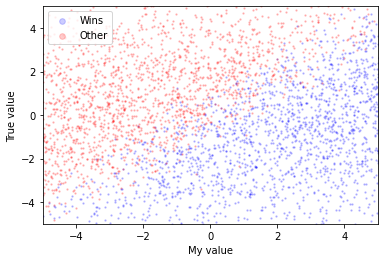

In [12]:
true_values, my_values, wins = sample(num_other = 1, sigma_other = 1.0, sigma_me = 10.0)
plt.scatter(my_values[wins], true_values[wins], s=2, c='b', alpha=0.2, label='Wins')
plt.scatter(my_values[~wins], true_values[~wins], s=2, c='r', alpha=0.2, label='Other')
plt.xlabel('My value')
plt.ylabel('True value')
plt.legend(markerscale=4)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

An important principle is that assuming we win, our observed value $\hat{v}$ is _more optimistic than_ the other people placing bid's. In the case that $\sigma = \sigma'$, then by symmetry we know that our signal $\hat{v}$ was larger than any of the $N$ other signals $\hat{v}_i$ from our competitors. When $\sigma \neq \sigma'$, this symmetry argument no longer holds, but the same intuition applies.

This means, in particular, that whenever we win the bid, the thing we win will be less valuable than we "expected" it to be. This is called the "Winner's Curse" and shows up in construction bids, recruiting, and many other situations. See [here](https://saylordotorg.github.io/text_introduction-to-economic-analysis/s21-05-the-winner-s-curse-and-linkage.html) for a good overview of the Winner's Curse.

We can gain intuition for the magnitude of the winner's curve by running a number of simulations. First, let's assume that everyone has the same value of $\sigma$ but vary the number of people participating:

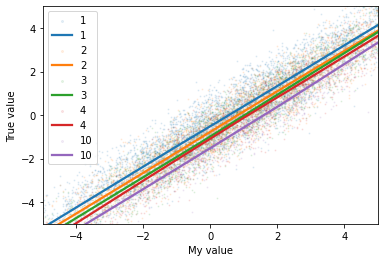

In [13]:
num_others = [1, 2, 3, 4, 10]
for num_other in num_others:
    true_values, my_values, wins = sample(num_other = num_other, sigma_me = 1.0, sigma_other = 1.0)
    sns.regplot(x=my_values[wins], y=true_values[wins], lowess=True, scatter_kws={'alpha': 0.1, 's': 1, 'label' : str(sigma_other)})
plt.xlabel('My value')
plt.ylabel('True value')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend(labels=np.repeat(num_others, 2).flatten(), markerscale=2)
plt.show()

How can we mathematically calculate the magnitude of the Winner's Curse? Suppose we have the following setting:
 * The true value $v^*$ is drawn from a prior distribution $\mathcal{N}(0, \sigma_0^2)$.
 * Each participant $i$ observes a value $\hat{v}_i$ equal to $v^* + Z_i$, for a random variable $Z_i$ drawn from $\mathcal{N}(v^*, \sigma^2)$.
 * Each participant has the same utility function, meaning that the winning bid will end up being whoever has the largest $Z_i$.
 
What is the value of $v^*$ assuming that we end up winning? In that case, we can condition on $\hat{v} = v^* + \max_{i=1}^{N+1} Z_i$, since we win exactly when we are the max of the $N+1$ estimates.

There are two ways to handle this:
 * A frequentist approach, where we simply subtract the expected value of the maximum of $N+1$ Gaussians, to account for the expected amount that we overbid. This is roughly equal to $\sigma \cdot \sqrt{2\log(N+1)}$, though in the case of heavier-tailed uncertainty it will grow faster with $N$.
 * A Bayesian approach, where we estimate the expected value of $v^*$ conditional on $\hat{v}$, making use of our prior. This is implicitly what we are doing above.

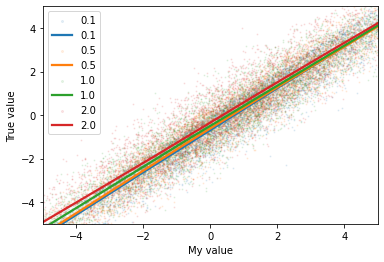

In [14]:
sigmas = [0.1, 0.5, 1.0, 2.0]
for sigma_other in sigmas:
    true_values, my_values, wins = sample(num_other = 1, sigma_me = 1.0, sigma_other = sigma_other)
    sns.regplot(x=my_values[wins], y=true_values[wins], lowess=True, scatter_kws={'alpha': 0.1, 's': 1, 'label' : str(sigma_other)})
plt.xlabel('My value')
plt.ylabel('True value')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend(labels=np.repeat(sigmas, 2).flatten(), markerscale=2)
plt.show()

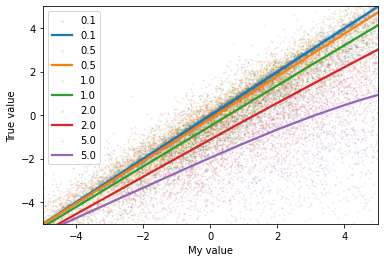

In [15]:
sigmas = [0.1, 0.5, 1.0, 2.0, 5.0]
for sigma_me in sigmas:
    true_values, my_values, wins = sample(num_other = 1, sigma_me = sigma_me, sigma_other = 1.0)
    sns.regplot(x=my_values[wins], y=true_values[wins], lowess=True, scatter_kws={'alpha': 0.1, 's': 1, 'label' : str(sigma_other)})
plt.xlabel('My value')
plt.ylabel('True value')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend(labels=np.repeat(sigmas, 2).flatten(), markerscale=2)
plt.show()